Loading chromosome: human21.fna
Genes: kcne1.fna
  Total codons: 45079
  Unique codons: 64
  Select codons for testing: 50

--- Timing Summary (kcne1.fna vs human21.fna) ---
TST search total time:     0.000040 sec
Brute-force total time:    51.561617 sec
Loading chromosome: human21.fna
Genes: kcne2.fna
  Total codons: 4917
  Unique codons: 64
  Select codons for testing: 50

--- Timing Summary (kcne2.fna vs human21.fna) ---
TST search total time:     0.000054 sec
Brute-force total time:    49.210667 sec


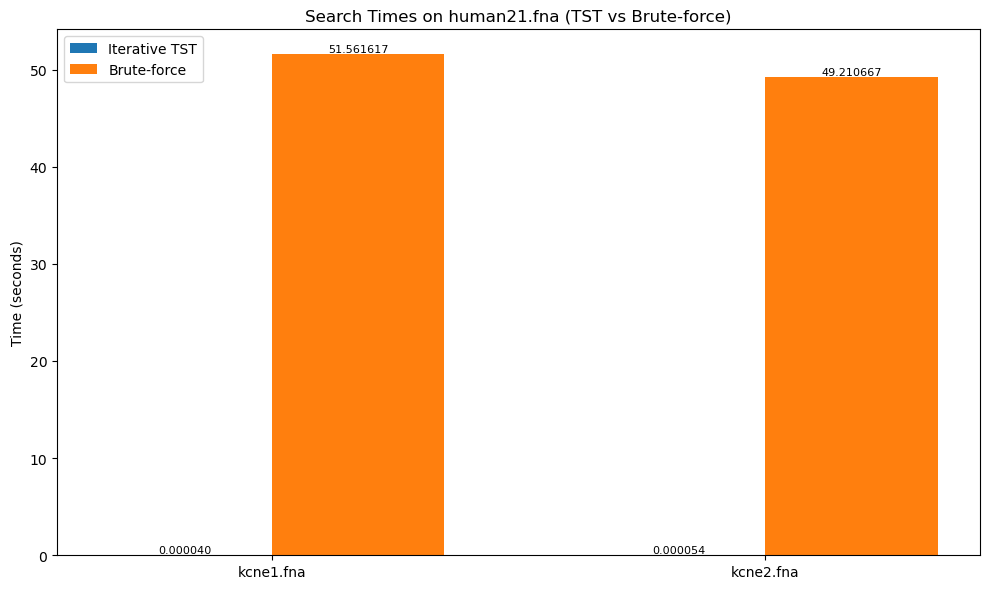

In [2]:
from tst import IterativeTST
from brute_force import brute_force_search
from sequence_utils import load_sequence, build_codons
from compare_with_graphs import time_tst_search
import time
import matplotlib.pyplot as plt

def build_tst_for_genes(gene_files):
    """
    Build a single IterativeTST for one or more gene FASTA files.
    Returns:
      - TST with all codons
      - list of all codons
      - set of unique codons
      - select_codons (up to 50) for testing
    """
    tst = IterativeTST()
    all_codons = []
    codon_set = set()
    
    for gene_file in gene_files:
        seq = load_sequence(gene_file)
        codons = build_codons(seq)
        for idx, codon in enumerate(codons):
            tst.put(codon, idx)
            all_codons.append(codon)
            codon_set.add(codon)
    
    unique_codons = list(codon_set)
    select_codons = unique_codons[:50] if len(unique_codons) > 50 else unique_codons
    
    print(f"Genes: {', '.join(gene_files)}")
    print(f"  Total codons: {len(all_codons)}")
    print(f"  Unique codons: {len(codon_set)}")
    print(f"  Select codons for testing: {len(select_codons)}")
    
    return tst, all_codons, codon_set, select_codons

def time_bruteforce_search(seq, select_codons):
    start = time.time()
    for codon in select_codons:
        _ = brute_force_search(seq, codon)
    end = time.time()
    return end - start

def compare_genes_on_chromosome(chromosome_file, gene_files):
    """
    Compare TST vs brute-force search for multiple genes on a chromosome sequence.
    """
    print("="*50)
    print(f"Loading chromosome: {chromosome_file}")
    chromosome_seq = load_sequence(chromosome_file)
    
    tst, all_codons, codon_set, select_codons = build_tst_for_genes(gene_files)
    
    t_tst = time_tst_search(tst, select_codons)
    t_bf = time_bruteforce_search(chromosome_seq, select_codons)
    
    print(f"\n--- Timing Summary ({', '.join(gene_files)} vs {chromosome_file}) ---")
    print(f"TST search total time:     {t_tst:.6f} sec")
    print(f"Brute-force total time:    {t_bf:.6f} sec")
    
    return t_tst, t_bf, select_codons

def visualize_genes_on_chromosome(chromosome_file, gene_combinations):
    """
    Plot TST vs brute-force search times for multiple gene combinations on a chromosome.
    gene_combinations: list of lists of gene FASTA filenames
    """
    tst_times = []
    bf_times = []
    
    for genes in gene_combinations:
        t_tst, t_bf, _ = compare_genes_on_chromosome(chromosome_file, genes)
        tst_times.append(t_tst)
        bf_times.append(t_bf)
    
    # Plot
    x = range(len(gene_combinations))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.bar([i - width/2 for i in x], tst_times, width, label="Iterative TST")
    ax.bar([i + width/2 for i in x], bf_times, width, label="Brute-force")
    
    labels = [" + ".join(group) for group in gene_combinations]
    ax.set_xticks(list(x))
    ax.set_xticklabels(labels)
    ax.set_ylabel("Time (seconds)")
    ax.set_title(f"Search Times on {chromosome_file} (TST vs Brute-force)")
    ax.legend()
    
    # Add value labels
    for i, v in enumerate(tst_times):
        ax.text(i - width/2, v, f"{v:.6f}", ha="center", va="bottom", fontsize=8)
    for i, v in enumerate(bf_times):
        ax.text(i + width/2, v, f"{v:.6f}", ha="center", va="bottom", fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Example usage:
chromosome_file = "human21.fna"
gene_combinations = [
    ["kcne1.fna"],
    ["kcne2.fna"]
]

visualize_genes_on_chromosome(chromosome_file, gene_combinations)


Loading Human Chr21 and KCNE1...
Gene codons: 45079
Unique codons: 64
Select codons for testing: 50

--- Timing Summary (Human Chr21 vs KCNE1) ---
TST search total time:     0.000079 sec
Brute-force total time:    50.926013 sec


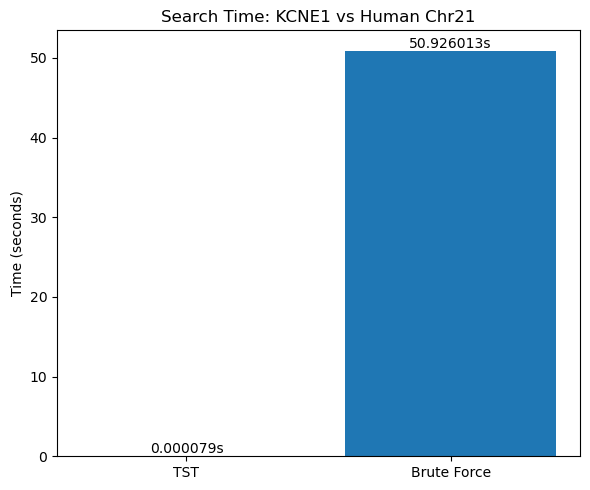

(7.915496826171875e-05, 50.92601299285889)

In [1]:
from tst import IterativeTST   # you can switch to TST() if needed
from brute_force import brute_force_search
from sequence_utils import load_sequence
from compare_with_graphs import time_tst_search
import time
import matplotlib.pyplot as plt


def build_data_structures_human(gene_path: str, genome_path: str):
    """
    Mirrors build_data_structures_for_gene() used for E. coli,
    but now works for KCNE1 + Chromosome 21.
    """

    # Load full genome and gene sequence
    genome = load_sequence(genome_path)
    gene = load_sequence(gene_path)

    # Build codons from gene (same as E. coli logic)
    codons = [gene[i:i+3] for i in range(0, len(gene) - 2, 3)]

    # Use IterativeTST
    tst = IterativeTST()

    codon_list = []
    codon_set = set()

    for idx, codon in enumerate(codons):
        if len(codon) == 3:
            tst.put(codon, idx)
            codon_list.append(codon)
            codon_set.add(codon)

    # Sample codons
    unique = list(codon_set)
    select_codons = unique[:50] if len(unique) > 50 else unique

    print(f"Gene codons: {len(codons)}")
    print(f"Unique codons: {len(codon_set)}")
    print(f"Select codons for testing: {len(select_codons)}")

    return genome, gene, codons, tst, codon_list, codon_set, select_codons



def time_brute_force(genome: str, select_codons):
    start = time.time()
    for c in select_codons:
        brute_force_search(genome, c)
    return time.time() - start



def compare_human_kcne1():
    """
    Recreates compare_all_genes_iter() but for Human Chr21 + KCNE1.
    """

    genome_path = "human21.fna"
    gene_path   = "kcne1.fna"

    print("="*60)
    print("Loading Human Chr21 and KCNE1...")
    genome, gene, codons, tst, codon_list, codon_set, select_codons = (
        build_data_structures_human(gene_path, genome_path)
    )

    # TST timing (reuse existing function)
    tst_time = time_tst_search(tst, select_codons)

    # Brute force timing
    bf_time = time_brute_force(genome, select_codons)

    print("\n--- Timing Summary (Human Chr21 vs KCNE1) ---")
    print(f"TST search total time:     {tst_time:.6f} sec")
    print(f"Brute-force total time:    {bf_time:.6f} sec")

    # Plot
    labels = ["TST", "Brute Force"]
    times = [tst_time, bf_time]

    plt.figure(figsize=(6, 5))
    plt.bar(labels, times)
    for i, v in enumerate(times):
        plt.text(i, v, f"{v:.6f}s", ha="center", va="bottom")
    plt.title("Search Time: KCNE1 vs Human Chr21")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    plt.show()

    return tst_time, bf_time



# Run comparison
compare_human_kcne1()
